In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

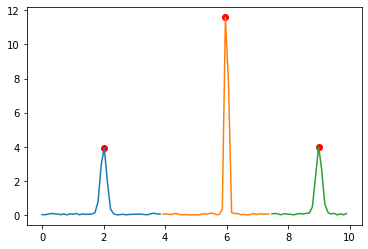

[2.43775823 1.76637546 2.43814191]


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import find_peaks

def gauss(x, mu, sigma, amp=1):
    return  amp * (1/(sigma*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-mu)/sigma)**2)))

mus = [2, 6, 9]
sigmas = [0.1, 0.05, 0.1]
amps = [1, 2, 1]
x = np.linspace(0, 10, 100)

data = np.zeros(shape=x.shape)
for m, s, a in zip(mus, sigmas, amps):
    data += gauss(x, m, s, a)

noise = np.random.random(data.shape) * 0.1
data = data + noise

# find the peaks and properties
peaks, properties = find_peaks(data, height=0,prominence=0.1, width=0.8)
npeak = len(peaks) # number of peaks
width = properties["widths"]

start = peaks-(2*width)
end = peaks+(2*width)
filtered =[]

# store the data near peaks into "filtered"
for i in range(npeak):
    if i == 0:
        start = 0
    else:
        start = (peaks[i] + peaks[i-1])/2
    if i == npeak-1:    
        end = -1
    else:
        end = (peaks[i] + peaks[i+1])/2
    p_x=x[int(start):int(end)]
    p_d=data[int(start):int(end)]
    filtered.append({'peak_number':i, 
                     "x":p_x, 
                     "data":p_d,
                     "start":int(start),
                     "end":int(end)})

# plot filtered data
for i in range(0,npeak):
    plt.plot(filtered[i]["x"], filtered[i]["data"])


plt.scatter(x[peaks],data[peaks],c="red") #mark peaks

plt.show()
print (properties["widths"])

r2_score: 0.9969778144695536
r2_score: 0.9995393902568427
r2_score: 0.9967053817436557
Root mean squared error: 0.04882092895877183


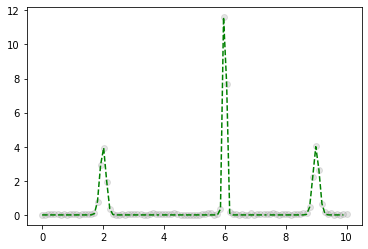

In [97]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

residual = np.zeros_like(data)
for i in range(npeak):
    popt, pcov = curve_fit(gauss, filtered[i]["x"], filtered[i]["data"], bounds=([0,0.01,1], [10,5,5])) 
    plt.plot(filtered[i]["x"], gauss(filtered[i]["x"], *popt),'g--')
    residual[filtered[i]["start"]:filtered[i]["end"]] = filtered[i]["data"]-gauss(filtered[i]["x"], *popt)
    print('r2_score:', r2_score(filtered[i]["data"], gauss(filtered[i]["x"], *popt)))
plt.scatter(x, data, color='grey', alpha=0.2)
rmse = np.sqrt(np.mean(residual**2))
print('Root mean squared error:', rmse)

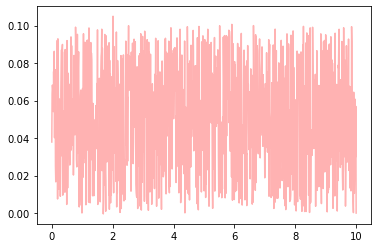

In [68]:
plt.plot(x,residual,color='red', alpha=0.3)

In [70]:
rmse

0.05757051199924995

In [ ]:
pi